In [1]:
%matplotlib inline

import os
import sys
sys.path.append('../')
import pickle

import numpy as np
import scipy.stats as st
from scipy.special import logsumexp
from scipy.stats import norm, gamma
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import yaml

In [2]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)
# plt.rc('font', family='serif')

In [3]:
folder_path = '../Experiments/estimate_s_g/results/synthetic_data/dataset_1/'
inf_file = 'inference_results.p'
s_g_file = 's_g_res.p'
gen_data_file = 'data.p'

data_input_file = 'data_input.yml'

In [4]:
with open(os.path.join(folder_path, inf_file), 'rb') as f:
    res = pickle.load(f)
LB_list, mu_g_X, mu_g2_X, hyper_params_list, \
 induced_points, integration_points, Kss_inv, ks_int_points, \
 ks_X, real_events, Sigma_g_s, mu_g_s, lmbda_star_q1, \
 alpha_q1, \
 beta_q1, test_log_like_list, mu_g2_int_points, mu_g_int_points, \
 log_lmbda_star_q1, grid, s, g = res

with open(os.path.join(folder_path, s_g_file), 'rb') as f:
    grid, s, g, cov_s, cov_g = pickle.load(f)
    
with open(os.path.join(folder_path, gen_data_file), 'rb') as f:
    gen_data = pickle.load(f)
    
with open(os.path.join(folder_path, data_input_file), 'r') as stream:
    config = yaml.safe_load(stream)
    time_bound = config.get('time_bound')
    memory_decay = config.get('memory_decay')

In [5]:
mean_phis = mu_g_X
std_phis = mu_g2_X - mu_g_X ** 2
history = real_events[0]

gen_phis = np.array(gen_data[1][0]).flatten()

grid_s_gt = gen_data[4]
s_gt = gen_data[5]

g_gt = gen_data[3]
grid_g_gt = gen_data[2]
g_tilde_gt = g_gt * np.exp(- memory_decay * grid_g_gt)

var_g = np.diag(cov_g)
var_s = np.diag(cov_s)

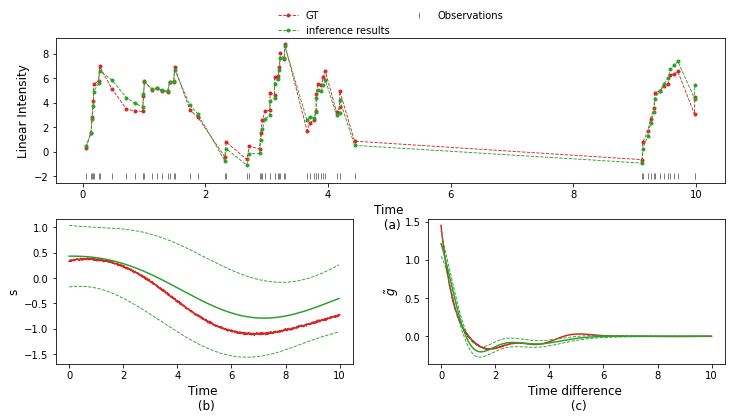

In [6]:
fig = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.25, hspace=0.25)

ax1 = fig.add_subplot(gs[0, :2])
ax1.plot(history, gen_phis, '.--', color='C3', label='GT', markersize=6, linewidth=0.9)
ax1.plot(history, mean_phis, '.--', label='inference results', color='#2ca02c', markersize=6, linewidth=0.9)
ax1.plot(history, np.repeat(-2, len(history)), '|', color='C7', label='Observations')
ax1.set_xlabel('Time \n (a)')
ax1.set_ylabel('Linear Intensity')
ax1.legend(loc='center', bbox_to_anchor= (0.5, 1.1), ncol=2,
            borderaxespad=0, frameon=False)

ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(grid_s_gt, s_gt, color='C3', label='GT')
ax2.plot(grid, s, label='inference', color='#2ca02c')
ax2.plot(grid, s + np.sqrt(var_s), '--', color='#2ca02c', linewidth=0.9)
ax2.plot(grid, s - np.sqrt(var_s), '--', color='#2ca02c', linewidth=0.9)
ax2.set_xlabel('Time \n (b)')
ax2.set_ylabel('s')

ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(grid_g_gt, g_tilde_gt, color='C3', label='GT')
ax3.plot(grid, g, label='inference', color='#2ca02c')
ax3.plot(grid, g + np.sqrt(var_g), '--', color='#2ca02c', linewidth=0.9)
ax3.plot(grid, g - np.sqrt(var_g), '--', color='#2ca02c',linewidth=0.9)
ax3.set_xlabel('Time difference \n (c)')
ax3.set_ylabel(r'$\tilde{g}$')

plt.show()